# Details
### Objective
To classify the intent of the person and the speech, and to build a simple chatbot using it

### [Dataset Link](https://www.kaggle.com/datasets/elvinagammed/chatbots-intent-recognition-dataset/data)

---
### Resources
1. https://machinehack.com/story/a-gentle-introduction-to-text-analysis-methods-using-python
1. https://towardsdatascience.com/nlp-text-preprocessing-steps-tools-and-examples-94c91ce5d30
1. https://stagezero.ai/blog/text-preprocessing-techniques-nlp/
1. https://medium.com/nerd-for-tech/text-preprocessing-techniques-in-nlp-9431de089582

Text processing and embedding techniques

---
# To Do
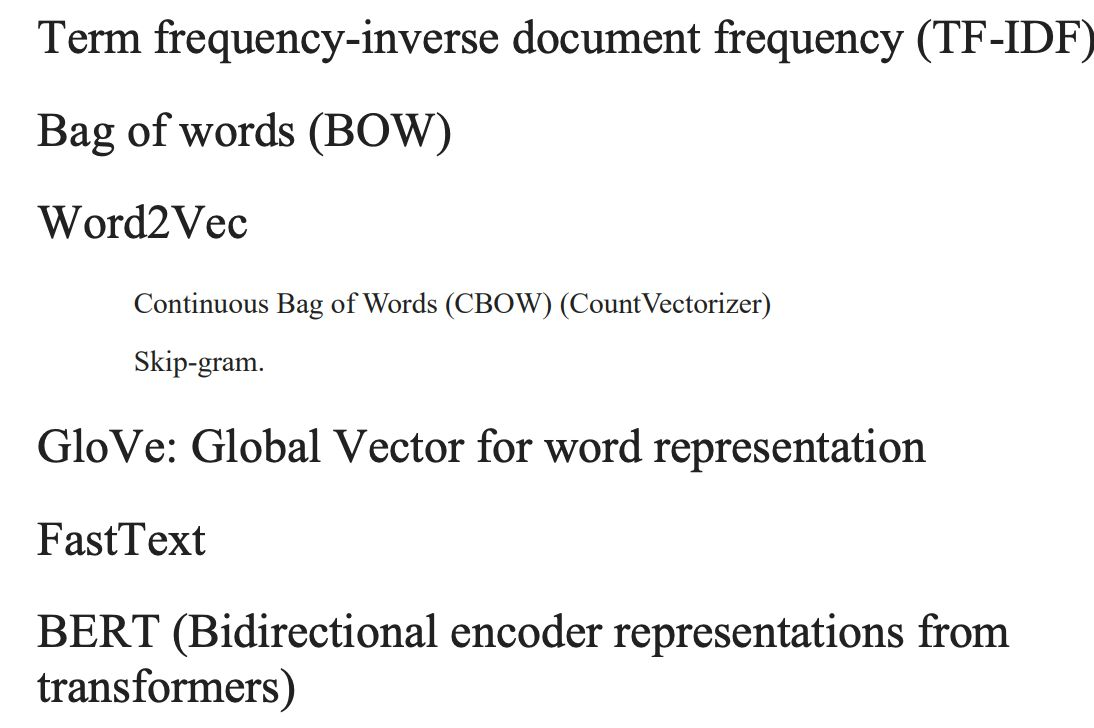

# Import the dataset


In [1]:
# from google.colab import drive
# drive.mount('/content/drive/')

# Importing Libraries

In [2]:
# !pip install gensim

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import json
import random
import re
import os
import urllib.request

import spacy
from scipy import spatial

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
import gensim

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

nlp = spacy.load('en_core_web_sm')

/Users/achintya/Achintya/Sem-6/NLP/Project/nlp/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/achintya/Achintya/Sem-6/NLP/Project/nlp/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# with open('Intent.json') as file:
#     intents = json.load(file)

In [5]:
# with open('/content/drive/MyDrive/Shared With Others/NLP Project/Intents.json') as f:
#   intents = json.load(f)

In [6]:
# intents

# Preprocessing steps

Split them into inputs and targets tensor. The target tensor has a bunch of list with a length of unique title list.

In [7]:
# def preprocessing(line):
#     line = re.sub(r'[^a-zA-z.?!\']', ' ', line)
#     line = re.sub(r'[ ]+', ' ', line)
#     return line

In [8]:
# # Get text and intent title from json data
# inputs, targets = [], []

# classes = []
# intent_doc = {}

# for intent in intents['intents']:
#     if intent['intent'] not in classes:
#         classes.append(intent['intent'])
#     if intent['intent'] not in intent_doc:
#         intent_doc[intent['intent']] = []

#     for text in intent['text']:
#         inputs.append(preprocessing(text))
#         targets.append(intent['intent'])

#     for response in intent['responses']:
#         intent_doc[intent['intent']].append(response)

## Reading Data

In [9]:
with open('Intent_simple.json', 'r') as file:
    data = json.load(file)

In [10]:
classes = list(data.keys())
inputs = [_ for intent in classes for _ in data[intent]]

for i in range(len(inputs)):
    inputs[i] = re.sub(r'[^a-zA-z.?!\']', ' ', inputs[i])
    inputs[i] = re.sub(r'[ ]+', ' ', inputs[i])

targets = [intent for intent in classes for _ in data[intent]]

---
Create Categorical columns for the Chatbot

In [11]:
def create_categorical_target(targets):
    word={}
    categorical_target=[]
    counter=0
    for trg in targets:
        if trg not in word:
            word[trg]=counter
            counter+=1
        categorical_target.append(word[trg])

    categorical_tensor = tf.keras.utils.to_categorical(categorical_target, num_classes=len(word))
    return categorical_tensor, dict((v,k) for k, v in word.items())

# Preprocess output data
target_tensor, trg_index_word = create_categorical_target(targets)

In [12]:
def tokenize_data(input_list):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', oov_token='<unk>')
    tokenizer.fit_on_texts(input_list)
    input_seq = tokenizer.texts_to_sequences(input_list)
    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, padding='pre')

    return tokenizer, input_seq

tokenizer, input_tensor = tokenize_data(inputs)

target = np.argmax(target_tensor, axis=1)


# Embedding Steps

---
## Build a BoW Model for the data

In [13]:
vectorizer = CountVectorizer()
vectorizer.fit(inputs)
X_count = vectorizer.transform(inputs)

X_train, X_test, y_train, y_test = train_test_split(X_count, target, test_size=0.2, random_state=42)

clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

y_pred = clf_tfidf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9562841530054644
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        13
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        20
           4       1.00      0.95      0.98        21
           5       0.93      0.74      0.82        19
           6       0.78      0.95      0.86        19
           7       0.93      1.00      0.96        13
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        15

    accuracy                           0.96       183
   macro avg       0.96      0.96      0.96       183
weighted avg       0.96      0.96      0.96       183



---
## Build a TF IDF Model for the data

In [14]:
vectorizer = TfidfVectorizer()
vectorizer.fit(inputs)
X_tfidf = vectorizer.transform(inputs)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, target, test_size=0.2, random_state=42)

clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

y_pred = clf_tfidf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9672131147540983
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        13
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        20
           4       1.00      0.95      0.98        21
           5       0.94      0.84      0.89        19
           6       0.86      0.95      0.90        19
           7       0.93      1.00      0.96        13
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        15

    accuracy                           0.97       183
   macro avg       0.97      0.97      0.97       183
weighted avg       0.97      0.97      0.97       183



---
## Build a GloVe Model for the data

[Reference](https://analyticsindiamag.com/hands-on-guide-to-word-embeddings-using-glove/#:~:text=It%20is%20an%20unsupervised%20learning%20algorithm%20developed%20by,derive%20the%20relationship%20between%20the%20words%20from%20statistics.)

In [60]:
embeddings_index = {}
with open('./models/glove/glove.6B.50d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_matrix = np.zeros((len(vectorizer.vocabulary_) + 1, 50))
for word, i in vectorizer.vocabulary_.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embeddings_glove = []
for sentence in inputs:
    sentence_embedding = np.zeros(50)
    for word in sentence.split():
        if word in embeddings_index:
            sentence_embedding += embeddings_index[word]
    embeddings_glove.append(sentence_embedding)

embeddings_glove = np.array(embeddings_glove)

X_train, X_test, y_train, y_test = train_test_split(embeddings_glove, target, test_size=0.2, random_state=42)

clf_glove = RandomForestClassifier()
clf_glove.fit(X_train, y_train)

y_pred = clf_glove.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7978142076502732
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.39      1.00      0.57        13
           2       0.90      1.00      0.95        18
           3       0.00      0.00      0.00        20
           4       0.94      0.71      0.81        21
           5       0.84      0.84      0.84        19
           6       0.88      0.79      0.83        19
           7       0.85      0.85      0.85        13
           8       0.80      1.00      0.89        12
           9       1.00      1.00      1.00        12
          10       0.78      0.93      0.85        15

    accuracy                           0.80       183
   macro avg       0.76      0.83      0.78       183
weighted avg       0.76      0.80      0.77       183



/Users/achintya/Achintya/Sem-6/NLP/Project/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/achintya/Achintya/Sem-6/NLP/Project/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/achintya/Achintya/Sem-6/NLP/Project/nlp/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [16]:
# tsne = TSNE(n_components=2)
# Y = tsne.fit_transform(embedding_matrix)

# plt.scatter(Y[:, 0], Y[:, 1])
# plt.show()

---
## Build a Word2Vec Model

References :
1. [Documentation](https://radimrehurek.com/gensim/models/word2vec.html)
1. [Documentation 2](https://radimrehurek.com/gensim/scripts/word2vec2tensor.html)
1. [Tutorial](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)

In [36]:
model = gensim.models.Word2Vec([sentence.split() for sentence in inputs], min_count=1)
words = model.wv.index_to_key
embedding_matrix = np.zeros((len(words) + 1, model.vector_size))
for i, word in enumerate(words):
    embedding_matrix[i] = model.wv[word]

embeddings_word2vec = []
for sentence in inputs:
    vector = np.zeros(model.vector_size)
    for word in sentence.split():
        vector += model.wv[word]
    embeddings_word2vec.append(vector)

X_train, X_test, y_train, y_test = train_test_split(embeddings_word2vec, target, test_size=0.2, random_state=42)

clf_word2vec = RandomForestClassifier()
clf_word2vec.fit(X_train, y_train)

y_pred = clf_word2vec.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8688524590163934
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00        13
           2       0.89      0.94      0.92        18
           3       1.00      1.00      1.00        20
           4       0.89      0.76      0.82        21
           5       0.78      0.74      0.76        19
           6       0.62      0.84      0.71        19
           7       0.82      0.69      0.75        13
           8       0.91      0.83      0.87        12
           9       0.85      0.92      0.88        12
          10       1.00      0.87      0.93        15

    accuracy                           0.87       183
   macro avg       0.88      0.87      0.87       183
weighted avg       0.88      0.87      0.87       183



In [18]:
# print(embedding_matrix.shape)

In [19]:
# tsne = TSNE(n_components=2)
# Y = tsne.fit_transform(embedding_matrix)

# plt.scatter(Y[:, 0], Y[:, 1])
# plt.show()

In [20]:
# print('input shape: {} and output shape: {}'.format(input_tensor.shape, target_tensor.shape))

## BERT

In [21]:
import torch
from transformers import BertModel, BertTokenizer

model = BertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokens = [tokenizer.tokenize(sentence) for sentence in inputs]
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokens]

input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, padding='post')

attention_mask = torch.tensor([[int(token_id > 0) for token_id in input_sequence] for input_sequence in input_ids])

input_tensor = torch.tensor(input_ids)

with torch.no_grad():
    outputs = model(input_tensor, attention_mask=attention_mask)
    embeddings = outputs[0]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size=0.2, random_state=42)

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

clf_bert = RandomForestClassifier()
clf_bert.fit(X_train_reshaped, y_train)

y_pred = clf_bert.predict(X_test_reshaped)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9726775956284153
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        20
           4       0.95      0.90      0.93        21
           5       0.90      1.00      0.95        19
           6       1.00      1.00      1.00        19
           7       1.00      0.92      0.96        13
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      0.93      0.97        15

    accuracy                           0.97       183
   macro avg       0.98      0.97      0.97       183
weighted avg       0.97      0.97      0.97       183



## Roberta

In [23]:
from transformers import RobertaPreLayerNormForSequenceClassification
from transformers import RobertaTokenizer

model = RobertaPreLayerNormForSequenceClassification.from_pretrained('roberta-base', num_labels=len(classes))
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokens = [tokenizer.tokenize(sentence) for sentence in inputs]
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokens]

input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, padding='post')

input_tensor = torch.tensor(input_ids)

with torch.no_grad():
    outputs = model(input_tensor)
    embeddings = outputs[0]

print(embeddings.shape)

target = np.argmax(target_tensor, axis=1)

X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size=0.2, random_state=42)

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

clf_roberta = RandomForestClassifier()
clf_roberta.fit(X_train_reshaped, y_train)

y_pred = clf_roberta.predict(X_test_reshaped)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

You are using a model of type roberta to instantiate a model of type roberta-prelayernorm. This is not supported for all configurations of models and can yield errors.
Some weights of RobertaPreLayerNormForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['LayerNorm.bias', 'LayerNorm.weight', 'classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.LayerNorm.bias', 'encoder.layer.0.attention.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.

torch.Size([913, 11])
0.9344262295081968
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        13
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        20
           4       1.00      0.76      0.86        21
           5       0.75      0.95      0.84        19
           6       0.94      0.89      0.92        19
           7       0.71      0.77      0.74        13
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        15

    accuracy                           0.93       183
   macro avg       0.94      0.94      0.94       183
weighted avg       0.94      0.93      0.94       183



## Sentence Transformer (mpnet-base-v2)

In [24]:
# %pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(inputs)

target = np.argmax(target_tensor, axis=1)

X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size=0.2, random_state=42)

clf_sentence = RandomForestClassifier()
clf_sentence.fit(X_train, y_train)

y_pred = clf_sentence.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9617486338797814
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00        13
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        20
           4       1.00      0.90      0.95        21
           5       0.94      0.79      0.86        19
           6       0.79      1.00      0.88        19
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        15

    accuracy                           0.96       183
   macro avg       0.97      0.97      0.97       183
weighted avg       0.97      0.96      0.96       183



## DistilBert

In [25]:
from transformers import DistilBertModel, DistilBertTokenizer

model = DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

tokens = [tokenizer.tokenize(sentence) for sentence in inputs]
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokens]

input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, padding='post')

attention_mask = torch.tensor([[int(token_id > 0) for token_id in input_sequence] for input_sequence in input_ids])

input_tensor = torch.tensor(input_ids)

with torch.no_grad():
    outputs = model(input_tensor, attention_mask=attention_mask)
    embeddings = outputs[0]

target = np.argmax(target_tensor, axis=1)

X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size=0.2, random_state=42)

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

clf_distilbert = RandomForestClassifier()
clf_distilbert.fit(X_train_reshaped, y_train)

y_pred = clf_distilbert.predict(X_test_reshaped)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

torch.Size([913, 14, 768])
0.9398907103825137
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       1.00      1.00      1.00        13
           2       0.94      0.94      0.94        18
           3       1.00      1.00      1.00        20
           4       0.95      0.86      0.90        21
           5       0.82      0.95      0.88        19
           6       0.94      0.89      0.92        19
           7       1.00      1.00      1.00        13
           8       0.92      0.92      0.92        12
           9       1.00      1.00      1.00        12
          10       1.00      0.87      0.93        15

    accuracy                           0.94       183
   macro avg       0.95      0.94      0.95       183
weighted avg       0.94      0.94      0.94       183



In [26]:
# # %pip install tensorflow_hub
# import tensorflow_hub as hub
# import tensorflow as tf
# model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# embeddings = model(inputs)

# target = np.argmax(target_tensor, axis=1)

# X_train, X_test, y_train, y_test = train_test_split(embeddings, target, test_size=0.2, random_state=42)
  
# clf_use = RandomForestClassifier()
# clf_use.fit(X_train, y_train)

# y_pred = clf_use.predict(X_test)
# print(accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [27]:
# with open('Intent.json', 'r') as f:
#     data_intent  = json.load(f)

# data_simple = {data_intent['intents'][i]['intent']: data_intent['intents'][i]['text'] for i in range(len(data_intent['intents']))}

# with open('Intent_simple.json', 'w') as f:
#     json.dump(data_simple, f)